In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as col
from scipy.stats import linregress
from skimage.util.shape import view_as_blocks
import itertools
from matplotlib import cm
from matplotlib.animation import FuncAnimation, PillowWriter 
from tqdm import trange
import numpy as np
import math
import random
colors = ["#0F0C21", "#F7FF00","#00B6FF"]
cmap1 = col.LinearSegmentedColormap.from_list("mycmap", colors)

In [2]:
N=64
M=-np.ones((N,N),int)

In [3]:
allmoves=[[-2,0],[2,0],[0,-2],[0,2],[-1,-1],[-1,1],[1,-1],[1,1]]
def CheckSecondNeigh(Ma,point):
    Candidates=np.array(point)+np.array(allmoves)
    Candidates = Candidates[((Candidates>=0)&(Candidates<len(Ma))).all(axis=1)]

    Choices = np.array([choice for choice in Candidates if Ma[choice[0],choice[1]]>-1])
    if Choices.size !=0:
        return random.choice(Choices)
    else:
        return None
            
def Plot(Ma):
    plt.style.use('default')
    plt.figure(figsize = (8,8))
    plt.imshow(Ma,cmap=cmap1,vmin=-1,vmax=1 ,interpolation='nearest')
    plt.show()
    

In [4]:
def GetNumbers(A,D,tol,N):
    if ((N & (N-1) == 0) and N != 0):
        s=int(math.log2(N//2))
        if (2**(s*D)<A) and (N*N*2**(s*(D-2))>A):
            Check=True
            while Check:
                Nu=[int(np.random.poisson(lam=A*2**(-i*D))) for i in range(s+1)]
                Nu[0]=A
                if (Nu[s]>1) and (Nu[s]<=4):
                    Check=False
                    NNU=[-math.log2(Nu[i]+(Nu[i]==0)) for i in range(len(Nu))]
                    Stats=linregress(np.linspace(0,s,s+1), NNU)
                    if abs(D-Stats[0])>tol:
                        Check=True
                else:
                    Check=True
                for i in range(s):
                    if (Nu[i]<Nu[i+1]) or (Nu[i]>=4*Nu[i+1]):
                        Check=True
            return Nu,Stats[0]

        else:
            raise Exception("No se puede encontrar condición inicial para esa Área y Dimensión")
    else:
        raise Exception("El tamaño debe ser potencia de 2")
def MinMax(D,N):
    s=int(math.log2(N//2))
    print([2**(s*D),N*N*2**(s*(D-2))])
def Ocuppation(Ma,k,N):
    Lar=N//k
    Cant=N//(2**k)
    B = view_as_blocks(Ma, block_shape=(Cant, Cant))
    Ocup = [np.unique(B[i][j]) for i,j in itertools.product(range(len(B)), range(len(B)))]
    O = 0
    for i in range(len(Ocup)):
        if (not np.all(Ocup[i])):
            O=O+1
    return O
def Structurize(Ma,A,B,NuA,NuB,N):
    tries=1
    fila=0
    filb=0
    s=len(NuA)
    posibA = [np.array([x, y]) for x in range(N) for y in range(N)]
    posibB = [np.array([x, y]) for x in range(N) for y in range(N)]
    while (fila!=A or filb!=B):
        if (fila<A):
            ij=posibA.pop(random.randrange(len(posibA)-1))
            i=ij[0]
            j=ij[1]
            prev=Ma[i][j]
            if (prev==-1):
                Ma[i][j]=0
                che=[Ocuppation(Ma,1+k,N)>NuA[s-k-1] for k in range(s-1)]
                if np.any(che):
                    Ma[i][j]=prev
                else:
                    fila=fila+1
        if (filb<B):
            ij=posibB.pop(random.randrange(len(posibB)-1))
            i=ij[0]
            j=ij[1]
            prev=Ma[i][j]
            if (prev==-1):
                Ma[i][j]=1
                che=[Ocuppation(Ma-1,1+k,N)>NuB[s-k-1] for k in range(s-1)]
                if np.any(che):
                    Ma[i][j]=prev
                else:
                    filb=filb+1
        if (len(posibA)<5) or (len(posibB)<5):
            for i in range(N):
                for j in range(N):
                    Ma[i][j]=-1
            fila=0
            filb=0
            posibA = [np.array([x, y]) for x in range(N) for y in range(N)]
            posibB = [np.array([x, y]) for x in range(N) for y in range(N)]
            tries=tries+1
    return tries

def Count2(Ma):
    Celestes=0
    Amarillos=0
    Apaticos=0
    for i in range(len(Ma)):
        for j in range(len(Ma)):
            if Ma[i,j]!=-1:
                if Ma[i,j]==0:
                    Amarillos+=1
                if Ma[i,j]==1:
                    Celestes+=1
            else:
                Apaticos+=1
    print("Cel=",Celestes,"Ama=",Amarillos,"Apatics=",Apaticos,"Counted=",Celestes+Amarillos+Apaticos,"L*L=",len(Ma)*len(Ma))

In [5]:
MinMax(1.55,N)
NuA,dim = GetNumbers(614,1.55,0.02,N)
dim

[215.2694823049509, 861.0779292198037]


1.5421645643055044

In [39]:
NuA

[614, 202, 63, 25, 7, 3]

In [46]:
MinMax(1.48,N)
NuB,dim = GetNumbers(614,1.48,0.02,N)
dim

[168.89701257893051, 675.5880503157218]


1.4893902537890789

In [47]:
NuB

[614, 222, 73, 27, 8, 4]

In [58]:
%%time
M=-np.ones((N,N),int)
tries = Structurize(M,NuA[0],NuB[0],NuA,NuB,N)
tries

CPU times: total: 1min 1s
Wall time: 1min 1s


1

In [59]:
Ocuppation(M-1,1,N)

4

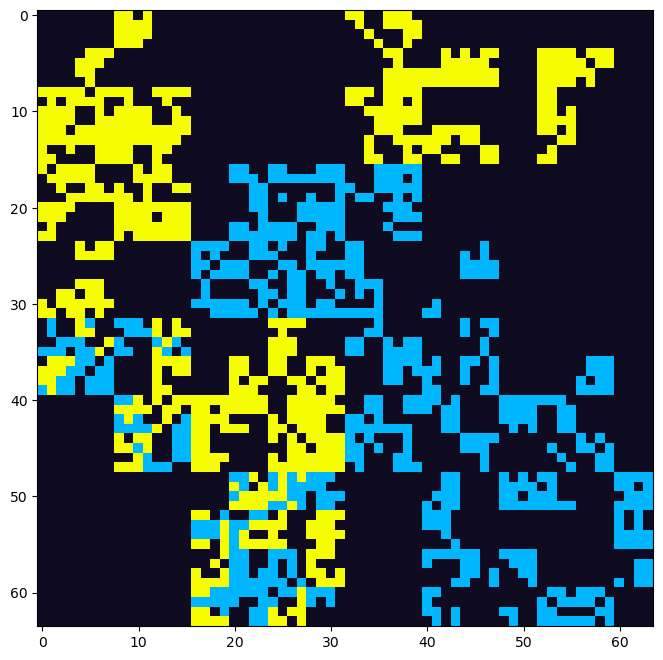

In [60]:
Plot(M)

In [61]:
Count2(M)

Cel= 614 Ama= 614 Apatics= 2868 Counted= 4096 L*L= 4096


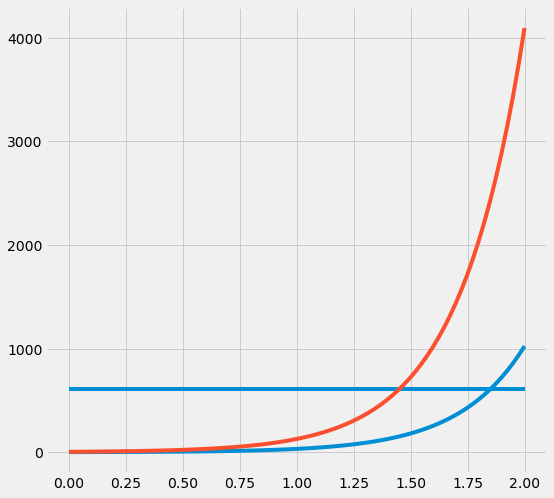

In [4]:
x=np.linspace(0,2,80)
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (8,8))
ax.plot(x,2**(5*x))
ax.plot(x,64*64*2**(5*(x-2)))
ax.hlines(614,0,2)
#plt.yscale("log")
plt.show()

In [6]:
def Randomize(Ma,btyr,apathy):
    if btyr<0.0 or btyr>1.0:
        raise Exception("La razon de celestes a amarillos es un número entre cero y uno.")
    if apathy<0.0 or apathy>1.0:
        raise Exception("La apatía es un número entre cero y uno.")
    for i in range(len(Ma)):
        for j in range(len(Ma)):
            a=np.random.rand(1)
            if a>apathy:
                r=np.random.rand(1)
                Ma[i,j]=1 if r<btyr else 0
            else:
                Ma[i,j]=-1
    
def SznajdStep(Ma):
    #elegir un punto al azar que no sea apático
    choice=np.array([np.random.randint(len(Ma)),np.random.randint(len(Ma))])
    while Ma[choice[0],choice[1]]==-1:
        choice=np.array([np.random.randint(len(Ma)),np.random.randint(len(Ma))])
    #elegir un segundo vecino al azar
    neig=CheckSecondNeigh(Ma,choice)
    #Lo igualo
    if not neig is None:
        Ma[neig[0],neig[1]]=Ma[choice[0],choice[1]]
        
def isgreen(Ma,i,j):
    apa=0
    Test=[Ma[i+1,j]!=Ma[i,j],Ma[i,j+1]!=Ma[i,j],Ma[i-1,j]!=Ma[i,j],Ma[i,j-1]!=Ma[i,j],(Ma[i-1,j-1]==Ma[i,j] or Ma[i-1,j-1]==-1),(Ma[i+1,j-1]==Ma[i,j] or Ma[i+1,j-1]==-1),(Ma[i-1,j+1]==Ma[i,j] or Ma[i-1,j+1]==-1),(Ma[i+1,j+1]==Ma[i,j] or Ma[i+1,j+1]==-1)]
    if Ma[i+1,j+1]==-1:
        apa+=1
    if Ma[i+1,j]==-1:
        apa+=1
    if Ma[i,j+1]==-1:
        apa+=1
    if Ma[i-1,j]==-1:
        apa+=1
    if Ma[i,j-1]==-1:
        apa+=1
    if Ma[i-1,j-1]==-1:
        apa+=1
    if Ma[i-1,j+1]==-1:
        apa+=1
    if Ma[i+1,j-1]==-1:
        apa+=1
    if apa<4: 
        #si tengo 3 o menos vecinos apaticos
        if sum(Test)>6: #y los vecinos son como deben o a lo sumo uno falla
            return True
        else:
            return False
    else: return False
    
def isgreen2(Ma,i,j):
    apa=0
    Test=[Ma[i+1,j]!=Ma[i,j],Ma[i,j+1]!=Ma[i,j],Ma[i-1,j]!=Ma[i,j],Ma[i,j-1]!=Ma[i,j]]
    if Ma[i+1,j]==-1:
        apa+=1
    if Ma[i,j+1]==-1:
        apa+=1
    if Ma[i-1,j]==-1:
        apa+=1
    if Ma[i,j-1]==-1:
        apa+=1
    if apa<3: 
        #si tengo 2 o menos vecinos apaticos
        if sum(Test)>3: #y los vecinos son como deben
            return True
        else:
            return False
    else: return False
        
def Count(Ma):
    Verdes=0
    Celestes=0
    Amarillos=0
    Apaticos=0
    for i in range(1,len(Ma)-1):
        for j in range(1,len(Ma)-1):
            if Ma[i,j]!=-1:
                if isgreen2(Ma,i,j):
                    Verdes+=1
                else:
                    if Ma[i,j]==0:
                        Amarillos+=1
                    if Ma[i,j]==1:
                        Celestes+=1
            else:
                Apaticos+=1
    for i in range(len(Ma)):
        if Ma[i,0]!=-1:
            if Ma[i,0]==0:
                Amarillos+=1
            if Ma[i,0]==1:
                Celestes+=1
        else:
            Apaticos+=1
        if Ma[i,len(Ma)-1]!=-1:
            if Ma[i,len(Ma)-1]==0:
                Amarillos+=1
            if Ma[i,len(Ma)-1]==1:
                Celestes+=1
        else:
            Apaticos+=1
    for j in range(1,len(Ma)-1):
        if Ma[0,j]!=-1:
            if Ma[0,j]==0:
                Amarillos+=1
            if Ma[0,j]==1:
                Celestes+=1
        else:
            Apaticos+=1
        if Ma[len(Ma)-1,j]!=-1:
            if Ma[len(Ma)-1,j]==0:
                Amarillos+=1
            if Ma[len(Ma)-1,j]==1:
                Celestes+=1
        else:
            Apaticos+=1
    return [Verdes,Celestes,Amarillos,Apaticos,Verdes+Celestes+Amarillos+Apaticos,len(Ma)*len(Ma)]

def Elect(Ma):
    [Verdes,Celestes,Amarillos,Apaticos,Suma,SumaReal]=Count(Ma)
    if Verdes>Celestes and Verdes>Amarillos:
        return [1,0,0],SumaReal-Apaticos,np.amax([Verdes-Celestes,Verdes-Amarillos])
    elif Celestes>Verdes and Celestes>Amarillos:
        return [0,1,0],SumaReal-Apaticos,np.amax([Celestes-Verdes,Celestes-Amarillos])
    elif Amarillos>Verdes and Celestes<Amarillos:
        return [0,0,1],SumaReal-Apaticos,np.amax([Amarillos-Celestes,Amarillos-Verdes])
    else:
        return [0,0,0],SumaReal-Apaticos,0

def RunSznajd(Ma,changetol,checkevery):
    #Paro la ejecucion si hubieron menos de 'changetol' cambios en los ultimos 'checkevery' pasos.
    i=1
    change=1000
    M0=Ma.copy()
    while change>changetol:
        SznajdStep(Ma)
        if i%checkevery==0:
            change=np.sum(abs(M0-Ma))
            M0=Ma.copy()
        i+=1
    return Ma,i

def SznajdStepforHighApathy(Ma,List):
    #elegir un punto al azar que no sea apático
    choice=random.choice(List)
    #elegir un segundo vecino al azar
    neig=CheckSecondNeigh(Ma,choice)
    #Lo igualo
    if not neig is None:
        Ma[neig[0],neig[1]]=Ma[choice[0],choice[1]]

def RunSznajdStruc(Ma,N,MinIters,changetol,checkevery):
    #creo la lista de activos
    List=[]
    for i in range(N):
        for j in range(N):
            if Ma[i][j]!=-1:
                List.append([i,j])
    #si o si hago un mínimo de iteraciones
    for _ in range(MinIters):
        SznajdStepforHighApathy(Ma,List)
    #Paro la ejecucion si hubieron menos de 'changetol' cambios en los ultimos 'checkevery' pasos.
    i=1
    change=1000
    M0=Ma.copy()
    while change>changetol:
        SznajdStepforHighApathy(Ma,List)
        if i%checkevery==0:
            change=np.sum(abs(M0-Ma))
            M0=Ma.copy()
        i+=1
    return Ma,i+MinIters

In [7]:
def Movie(Ma,name,fsteps,framess,fpss):
        plt.style.use('classic')
        fig = plt.figure(figsize = (8,8))
        im=plt.imshow(Ma,cmap=cmap1,vmin=-1,vmax=1 ,interpolation='nearest')
        def init():
            im.set_data(Ma)
            return [im]
        def animate(i):
            for j in range(fsteps):
                SznajdStep(Ma)
            im.set_array(Ma)
            return [im]
        ani = FuncAnimation(fig, animate, frames=framess)
        writer = PillowWriter(fps=fpss)  
        ani.save(name+".gif", writer=writer)

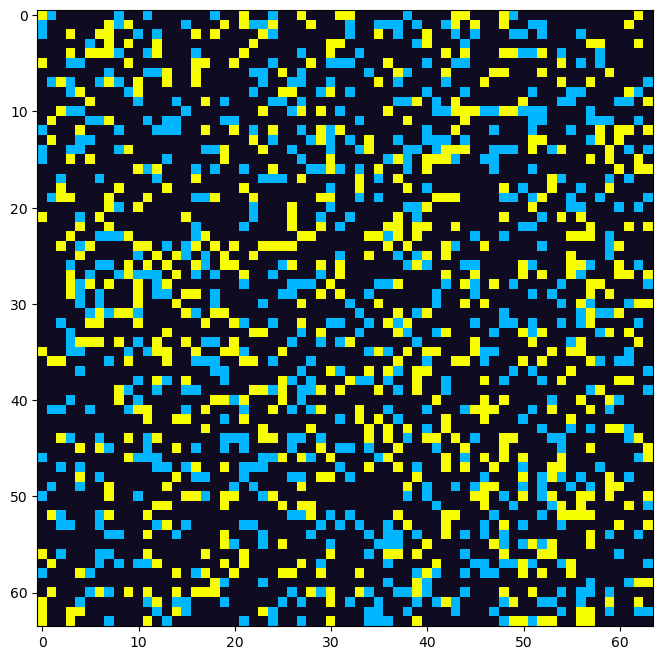

In [43]:
Randomize(M,0.5,0.70)
Plot(M)

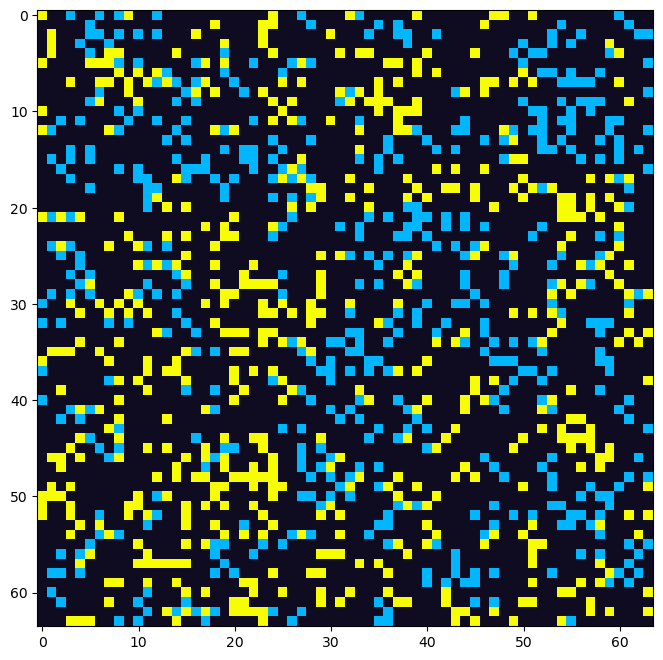

In [14]:
for i in range(10000):
    SznajdStep(M)
Plot(M)

In [ ]:
Movie(M,'structured',100,300,35)

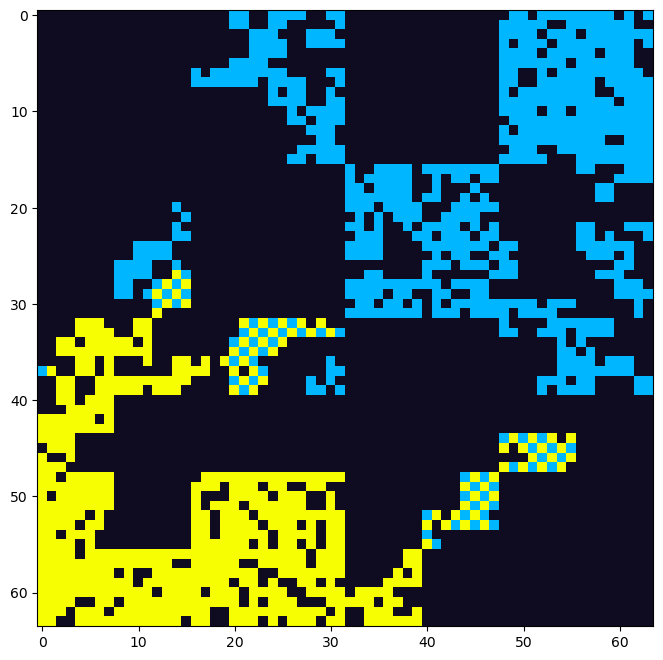

3090001
CPU times: total: 1min 35s
Wall time: 1min 37s


In [47]:
%%time
M,iters=RunSznajdStruc(M,N,50000,1,20000)
Plot(M)
print(iters)

In [48]:
Count(M)

[106, 623, 499, 2868, 4096, 4096]

In [49]:
Winner,Actives,Winby = Elect(M)
print(Winner,Actives,Winby)

[0, 1, 0] 1228 517


## Estructurado

In [8]:
MinMax(1.7,N)

[362.03867196751236, 1448.1546878700492]


In [9]:
%%time
runs=200
Area=int(N*N*0.30)
AreaA=int(Area*0.6)
AreaC=Area-AreaA
Apathy=Area/N*N
Winners=[0,0,0]
Winbyy=0
Time=0
MeanTries=0

for i in trange(runs):
    DA=1.75
    DC=1.48
    NuA,dimA = GetNumbers(Area,DA,0.02,N)
    NuC,dimC = GetNumbers(Area,DC,0.02,N)
    M=-np.ones((N,N),int)
    tries = Structurize(M,NuA[0],NuC[0],NuA,NuC,N)
    M,iters=RunSznajdStruc(M,N,50000,1,20000)
    Winner,Actives,Winby = Elect(M)
    Winners=np.add(Winners,Winner)
    Winbyy=Winbyy+Winby
    Time=Time+iters
    MeanTries=MeanTries+tries

Winners=np.array(Winners)/runs
Winbyy=Winbyy/runs
Time=Time/runs
MeanTries=MeanTries/runs
print(Winners,Winbyy,Time,MeanTries)

100%|██████████████████████████████████████████████████████████████████████████████| 6/6 [54:09:12<00:00, 32492.04s/it]

[[0.335 0.165 0.495]
 [0.365 0.225 0.41 ]
 [0.36  0.19  0.45 ]
 [0.305 0.175 0.52 ]
 [0.34  0.16  0.5  ]
 [0.34  0.145 0.515]] [614.21  638.63  635.345 681.375 756.56  724.82 ] [2659001. 3070101. 2857401. 2675101. 3013601. 2863101.] [1.02  1.065 1.085 1.115 1.05  1.125]
CPU times: total: 2d 5h 48min 55s
Wall time: 2d 6h 9min 12s
